In [ ]:
# menghubungkan colabs ke drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import modul yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [ ]:
#mengambil dataset dari drive
data = pd.read_csv('/content/drive/MyDrive/dataset/Binary_Class_Balanced_Dataset_4Lac_60_Features.csv')

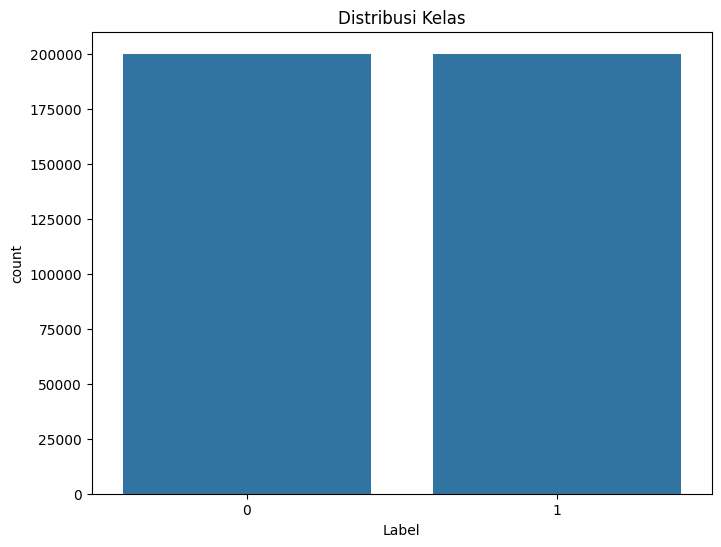

In [ ]:
#menampilkan class
plt.figure(figsize=(8, 6))
sns.countplot(x='Label', data=data)
plt.title('Distribusi Kelas')
plt.show()

In [ ]:
#memisahkan label
X = data.drop('Label', axis=1)
y = data['Label']

In [ ]:
#normalisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
#fungsi ddos dataset
class DDosDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.FloatTensor(X)
        self.y = torch.LongTensor(y)

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [ ]:
#model transformer decoder
class TransformerDecoderModel(nn.Module):
    def __init__(self, input_dim, num_classes, d_model=64, nhead=4, num_layers=2, dropout=0.1):
        super(TransformerDecoderModel, self).__init__()
        self.embedding = nn.Linear(input_dim, d_model)
        self.pos_encoder = nn.Sequential(
            nn.Linear(d_model, d_model),
            nn.ReLU(),
            nn.Linear(d_model, d_model)
        )
        decoder_layer = nn.TransformerDecoderLayer(d_model=d_model, nhead=nhead, dropout=dropout)
        self.transformer_decoder = nn.TransformerDecoder(decoder_layer, num_layers=num_layers)
        self.fc = nn.Linear(d_model, num_classes)

    def forward(self, x):
        x = self.embedding(x).unsqueeze(1)  # Add sequence dimension
        x = x + self.pos_encoder(x)
        x = self.transformer_decoder(x, x)  # Use x as both input and memory
        x = x.mean(dim=1)  # Global average pooling
        x = self.fc(x)
        return x

Fold 1/10
Epoch [1/10], Loss: 0.0585
Epoch [2/10], Loss: 0.0818
Epoch [3/10], Loss: 0.0291
Epoch [4/10], Loss: 0.0393
Epoch [5/10], Loss: 0.0489
Epoch [6/10], Loss: 0.0653
Epoch [7/10], Loss: 0.5323
Epoch [8/10], Loss: 0.6184
Epoch [9/10], Loss: 0.6956
Epoch [10/10], Loss: 0.6926
Accuracy: 0.4973
F1 Score: 0.3303
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     20109
           1       0.50      1.00      0.66     19891

    accuracy                           0.50     40000
   macro avg       0.25      0.50      0.33     40000
weighted avg       0.25      0.50      0.33     40000

Confusion Matrix:
[[    0 20109]
 [    0 19891]]


Fold 2/10


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [1/10], Loss: 0.0494
Epoch [2/10], Loss: 0.0294
Epoch [3/10], Loss: 0.0782
Epoch [4/10], Loss: 0.1011
Epoch [5/10], Loss: 0.6776
Epoch [6/10], Loss: 0.6917
Epoch [7/10], Loss: 0.6933
Epoch [8/10], Loss: 0.6941
Epoch [9/10], Loss: 0.6945
Epoch [10/10], Loss: 0.6959
Accuracy: 0.5008
F1 Score: 0.3342
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     19968
           1       0.50      1.00      0.67     20032

    accuracy                           0.50     40000
   macro avg       0.25      0.50      0.33     40000
weighted avg       0.25      0.50      0.33     40000

Confusion Matrix:
[[    0 19968]
 [    0 20032]]


Fold 3/10


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [1/10], Loss: 0.1214
Epoch [2/10], Loss: 0.5454
Epoch [3/10], Loss: 0.4724
Epoch [4/10], Loss: 0.4202
Epoch [5/10], Loss: 0.4807
Epoch [6/10], Loss: 0.6871
Epoch [7/10], Loss: 0.6929
Epoch [8/10], Loss: 0.6912
Epoch [9/10], Loss: 0.6935
Epoch [10/10], Loss: 0.6922
Accuracy: 0.5020
F1 Score: 0.3356
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67     20081
           1       0.00      0.00      0.00     19919

    accuracy                           0.50     40000
   macro avg       0.25      0.50      0.33     40000
weighted avg       0.25      0.50      0.34     40000

Confusion Matrix:
[[20081     0]
 [19919     0]]


Fold 4/10


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [1/10], Loss: 0.0643
Epoch [2/10], Loss: 0.0582
Epoch [3/10], Loss: 0.0499
Epoch [4/10], Loss: 0.0761
Epoch [5/10], Loss: 0.0758
Epoch [6/10], Loss: 0.0792
Epoch [7/10], Loss: 0.0768
Epoch [8/10], Loss: 0.0298
Epoch [9/10], Loss: 0.0387
Epoch [10/10], Loss: 0.1910
Accuracy: 0.9463
F1 Score: 0.9462
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.90      0.94     19933
           1       0.91      0.99      0.95     20067

    accuracy                           0.95     40000
   macro avg       0.95      0.95      0.95     40000
weighted avg       0.95      0.95      0.95     40000

Confusion Matrix:
[[17934  1999]
 [  150 19917]]


Fold 5/10
Epoch [1/10], Loss: 0.0940
Epoch [2/10], Loss: 0.0883
Epoch [3/10], Loss: 0.0524
Epoch [4/10], Loss: 0.2324
Epoch [5/10], Loss: 0.6970
Epoch [6/10], Loss: 0.6899
Epoch [7/10], Loss: 0.6937
Epoch [8/10], Loss: 0.6974
Epoch [9/10], Loss: 0.6899
Epoch [10/10], Loss: 0.6932
Accuracy: 0.4

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [1/10], Loss: 0.0759
Epoch [2/10], Loss: 0.0901
Epoch [3/10], Loss: 0.6964
Epoch [4/10], Loss: 0.6967
Epoch [5/10], Loss: 0.6954
Epoch [6/10], Loss: 0.6939
Epoch [7/10], Loss: 0.6925
Epoch [8/10], Loss: 0.6924
Epoch [9/10], Loss: 0.6946
Epoch [10/10], Loss: 0.6927
Accuracy: 0.4965
F1 Score: 0.3295
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.66     19860
           1       0.00      0.00      0.00     20140

    accuracy                           0.50     40000
   macro avg       0.25      0.50      0.33     40000
weighted avg       0.25      0.50      0.33     40000

Confusion Matrix:
[[19860     0]
 [20140     0]]


Fold 7/10


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [1/10], Loss: 0.0318
Epoch [2/10], Loss: 0.1975
Epoch [3/10], Loss: 0.2427
Epoch [4/10], Loss: 0.1563
Epoch [5/10], Loss: 0.0660
Epoch [6/10], Loss: 0.6932
Epoch [7/10], Loss: 0.6937
Epoch [8/10], Loss: 0.6937
Epoch [9/10], Loss: 0.6919
Epoch [10/10], Loss: 0.6947
Accuracy: 0.5007
F1 Score: 0.3341
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67     20026
           1       0.00      0.00      0.00     19974

    accuracy                           0.50     40000
   macro avg       0.25      0.50      0.33     40000
weighted avg       0.25      0.50      0.33     40000

Confusion Matrix:
[[20026     0]
 [19974     0]]


Fold 8/10


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [1/10], Loss: 0.0709
Epoch [2/10], Loss: 0.1091
Epoch [3/10], Loss: 0.6994
Epoch [4/10], Loss: 0.6783
Epoch [5/10], Loss: 0.6887
Epoch [6/10], Loss: 0.6945
Epoch [7/10], Loss: 0.6857
Epoch [8/10], Loss: 0.6909
Epoch [9/10], Loss: 0.6931
Epoch [10/10], Loss: 0.6949
Accuracy: 0.4972
F1 Score: 0.3303
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.66     19889
           1       0.00      0.00      0.00     20111

    accuracy                           0.50     40000
   macro avg       0.25      0.50      0.33     40000
weighted avg       0.25      0.50      0.33     40000

Confusion Matrix:
[[19889     0]
 [20111     0]]


Fold 9/10


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [1/10], Loss: 0.0769
Epoch [2/10], Loss: 0.0353
Epoch [3/10], Loss: 0.0606
Epoch [4/10], Loss: 0.0875
Epoch [5/10], Loss: 0.0476
Epoch [6/10], Loss: 0.0543
Epoch [7/10], Loss: 0.0720
Epoch [8/10], Loss: 0.1053
Epoch [9/10], Loss: 0.0754
Epoch [10/10], Loss: 0.0651
Accuracy: 0.5235
F1 Score: 0.4309
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.93      0.66     20064
           1       0.61      0.12      0.20     19936

    accuracy                           0.52     40000
   macro avg       0.56      0.52      0.43     40000
weighted avg       0.56      0.52      0.43     40000

Confusion Matrix:
[[18563  1501]
 [17559  2377]]


Fold 10/10
Epoch [1/10], Loss: 0.0860
Epoch [2/10], Loss: 0.0823
Epoch [3/10], Loss: 0.0538
Epoch [4/10], Loss: 0.0295
Epoch [5/10], Loss: 0.0177
Epoch [6/10], Loss: 0.0246
Epoch [7/10], Loss: 0.0759
Epoch [8/10], Loss: 0.2168
Epoch [9/10], Loss: 0.1626
Epoch [10/10], Loss: 0.1246
Accuracy: 0.

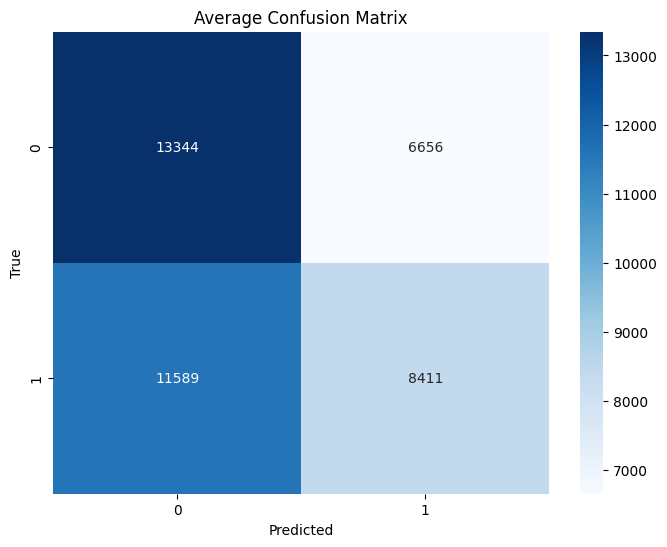

In [ ]:
#k fold cross validation
k_folds = 10
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Tidak perlu mengubah y ke values karena sudah numpy array
input_dim = X.shape[1]
num_classes = 2
num_epochs = 10
batch_size = 64
learning_rate = 0.001

all_accuracies = []
all_f1_scores = []
all_confusion_matrices = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X_scaled)):
    print(f'Fold {fold + 1}/{k_folds}')

    X_train, X_val = X_scaled[train_idx], X_scaled[val_idx]
    y_train, y_val = y[train_idx].values, y[val_idx].values

    train_dataset = DDosDataset(X_train, y_train)
    val_dataset = DDosDataset(X_val, y_val)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    model = TransformerDecoderModel(input_dim, num_classes)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Training
    for epoch in range(num_epochs):
        model.train()
        for batch_X, batch_y in train_loader:
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()

        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

    # Evaluation
    model.eval()
    y_pred = []
    y_true = []

    with torch.no_grad():
        for batch_X, batch_y in val_loader:
            outputs = model(batch_X)
            _, predicted = torch.max(outputs, 1)
            y_pred.extend(predicted.numpy())
            y_true.extend(batch_y.numpy())

    # Metrics
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')
    cm = confusion_matrix(y_true, y_pred)

    all_accuracies.append(accuracy)
    all_f1_scores.append(f1)
    all_confusion_matrices.append(cm)

    print(f'Accuracy: {accuracy:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print('Classification Report:')
    print(classification_report(y_true, y_pred))
    print('Confusion Matrix:')
    print(cm)
    print('\n')

# Final results
print('Final Results:')
print(f'Average Accuracy: {np.mean(all_accuracies):.4f} (+/- {np.std(all_accuracies):.4f})')
print(f'Average F1 Score: {np.mean(all_f1_scores):.4f} (+/- {np.std(all_f1_scores):.4f})')

# Plot average confusion matrix
avg_cm = np.mean(all_confusion_matrices, axis=0)
plt.figure(figsize=(8, 6))
sns.heatmap(avg_cm, annot=True, fmt='.0f', cmap='Blues')
plt.title('Average Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
print('Final Results:')
print(f'Average Accuracy: {np.mean(all_accuracies):.4f} (+/- {np.std(all_accuracies):.4f})')
print(f'Average F1 Score: {np.mean(all_f1_scores):.4f} (+/- {np.std(all_f1_scores):.4f})')

Final Results:
Average Accuracy: 0.5439 (+/- 0.1346)
Average F1 Score: 0.4091 (+/- 0.1819)


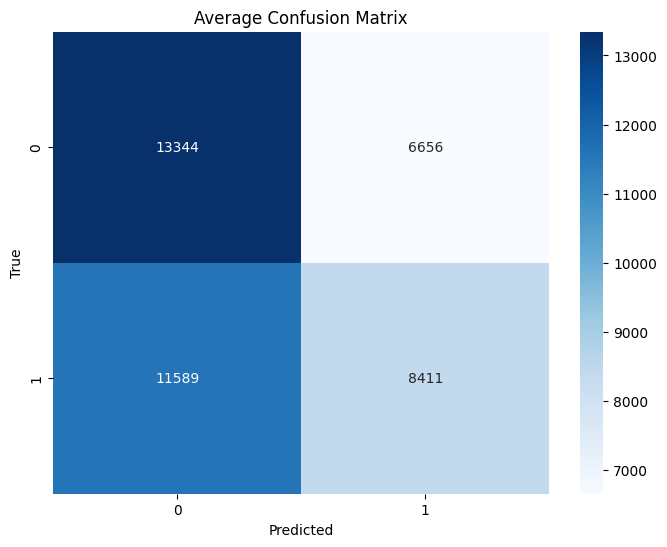

In [ ]:
avg_cm = np.mean(all_confusion_matrices, axis=0)
plt.figure(figsize=(8, 6))
sns.heatmap(avg_cm, annot=True, fmt='.0f', cmap='Blues')
plt.title('Average Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

<ipython-input-22-8ca8d246c1d8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric_names, y=metrics, palette='viridis')


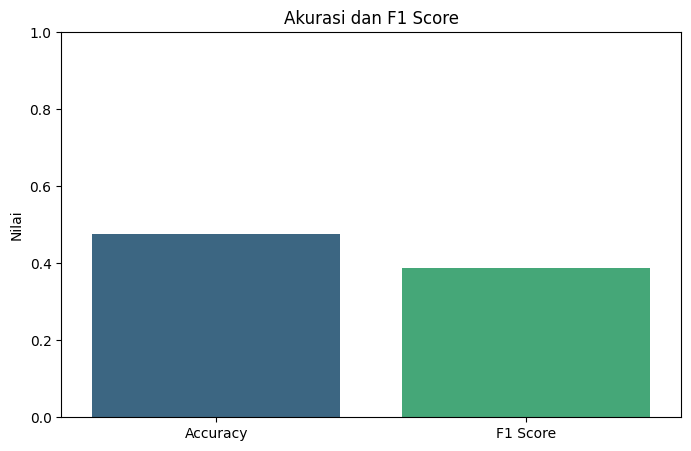

In [ ]:
# Visualisasi Akurasi dan F1 Score
metrics = [accuracy, f1]
metric_names = ['Accuracy', 'F1 Score']

plt.figure(figsize=(8, 5))
sns.barplot(x=metric_names, y=metrics, palette='viridis')
plt.title('Akurasi dan F1 Score')
plt.ylim(0, 1)
plt.ylabel('Nilai')
plt.show()